# Clustering of Countries

## Problem Statement:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Country-data.csv')
df.drop_duplicates(inplace = True)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Outlier Analysis

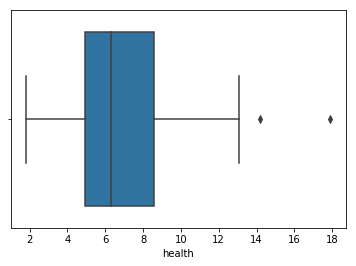

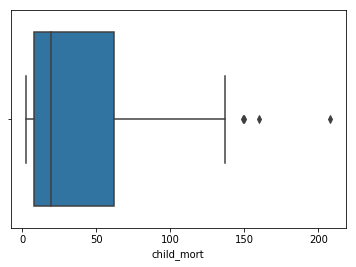

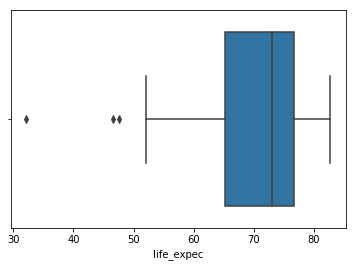

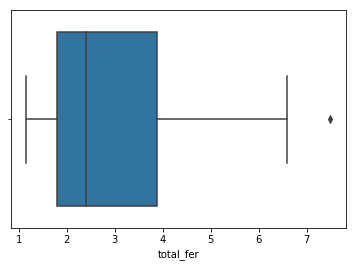

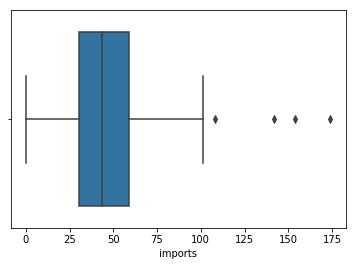

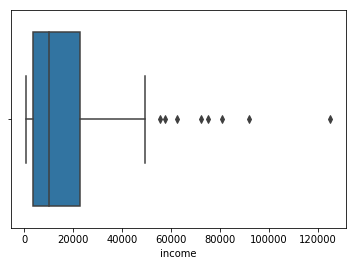

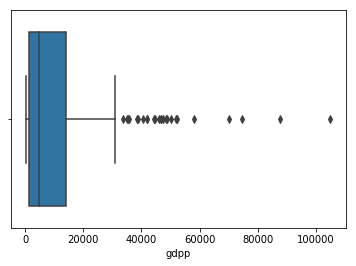

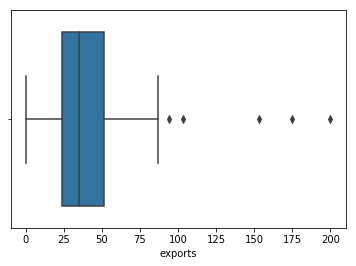

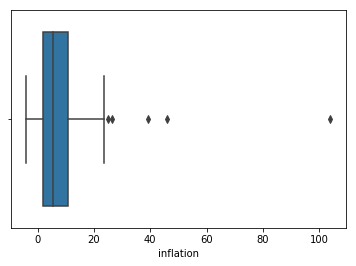

In [6]:
for i in list(set(df.columns).difference(set({'country'}))):
    sns.boxplot(df[i])
    plt.show()

We can see that for all the features there exists outliers. Therefore they can potentially form a cluster and therefore we won't be removing the outliers. Also, since the dataset happens to be very small, it's not advisable to remove outliers.

In [7]:
X = df[list(set(df.columns).difference(set({'country'})))]
X.head()

,health,child_mort,life_expec,total_fer,imports,income,gdpp,exports,inflation
0,7.58,90.2,56.2,5.82,44.9,1610,553,10.0,9.44
1,6.55,16.6,76.3,1.65,48.6,9930,4090,28.0,4.49
2,4.17,27.3,76.5,2.89,31.4,12900,4460,38.4,16.10
3,2.85,119.0,60.1,6.16,42.9,5900,3530,62.3,22.40
4,6.03,10.3,76.8,2.13,58.9,19100,12200,45.5,1.44


#### Scaling the features

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In the above step we have fit and transformed data.

## Hopkins Test
We shall now perform the Hopkins test on the data to see if there is any cluster tendency or not. If the value is greater than 0.5 then we can say there is.

In [9]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H

round(hopkins(pd.DataFrame(X_scaled)), 2)

0.89

Since the value has come out to more than 0.50, therefore we can conclude that there exists cluster tendency and consequently we should go for the Clustering algorithms.

#### Performing the PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)

In [11]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

#### Components from the PCA

In [12]:
pca.components_

array([[ 0.15083782, -0.41951945,  0.42583938, -0.40372896,  0.16148244,
         0.39844111,  0.39264482,  0.28389698, -0.19317293],
       [-0.24308678,  0.19288394, -0.22270674,  0.15523311,  0.67182064,
         0.02253553, -0.0460224 ,  0.61316349, -0.00840447],
       [-0.59663237, -0.02954353,  0.11391854,  0.01954925, -0.29992674,
         0.3015475 ,  0.12297749,  0.14476069,  0.64251951],
       [ 0.4618975 ,  0.37065326, -0.20379723,  0.37830365, -0.07190746,
         0.39215904,  0.53199457,  0.00309102,  0.15044176],
       [ 0.51800037, -0.16896968,  0.1082198 , -0.13526221,  0.25537642,
        -0.2471496 , -0.18016662,  0.05761584,  0.7148691 ],
       [ 0.00727646,  0.20062815, -0.60112652, -0.75068875, -0.03003154,
         0.16034699,  0.01677876, -0.05933283,  0.06628537],
       [-0.24983051, -0.07948854,  0.01848639,  0.02882643,  0.59218953,
         0.09556237,  0.24299776, -0.70730269,  0.10463252],
       [ 0.07249683, -0.68274306, -0.50466425,  0.29335267, -0

In [13]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [14]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

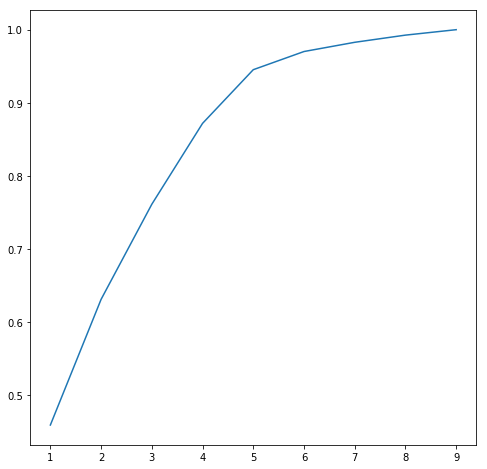

In [15]:
plt.figure(figsize = (8, 8))
sns.lineplot(y = cumulative_variance, x = range(1, len(cumulative_variance)+1))
plt.show()

We see that for the first 5 principal components, the explained variance ratio becomes close to 0.95. So we will be taking the first 5 to principal componenets.

In [16]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 5)

In [17]:
X_scaled_pca = pca_final.fit_transform(X_scaled)

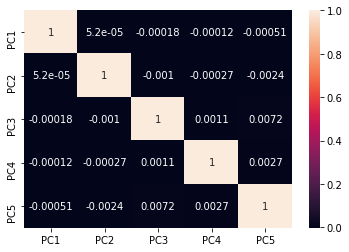

In [18]:
sns.heatmap(pd.DataFrame(X_scaled_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']).corr(), annot = True)

We can see that the principal components have very weak correlation with each other.

In [19]:
df_final = pd.DataFrame(X_scaled_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_final.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


## KMeans Clustering

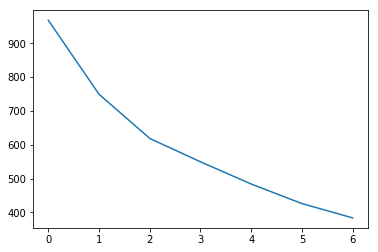

In [20]:
# Determining the optimal number of clusters
from sklearn.cluster import KMeans
ssd = []
n_clusters = [2, 3, 4, 5, 6, 7, 8]
for i in n_clusters:
    kmeans = KMeans(n_clusters = i, max_iter=50)
    kmeans.fit(df_final)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

From the above plot we see that for i == 4, the decrease in the function while moving from i == 4 to i == 5 isn't as steep as for rest of the cases and also for 167 countries, more than 4 clusters can be too much. So for now we choose the number of clusters to be 4. We will also use Silhouette score to make that decision.

In [21]:
# Silhouette Score
from sklearn.metrics import silhouette_score
n_clusters = [2, 3, 4, 5, 6, 7, 8]
sil = []
for i in n_clusters:
    kmeans = KMeans(n_clusters = i, max_iter=50, random_state = 42)
    kmeans.fit(df_final)
    cluster_labels = kmeans.labels_
    silhouette_avg = round(silhouette_score(df_final, cluster_labels), 2)
    sil.append(silhouette_avg)
    print("For n_clusters = {0}, the silhouette score is {1}".format(i, silhouette_avg, 2))

For n_clusters = 2, the silhouette score is 0.3
For n_clusters = 3, the silhouette score is 0.31
For n_clusters = 4, the silhouette score is 0.33
For n_clusters = 5, the silhouette score is 0.25
For n_clusters = 6, the silhouette score is 0.26
For n_clusters = 7, the silhouette score is 0.28
For n_clusters = 8, the silhouette score is 0.25


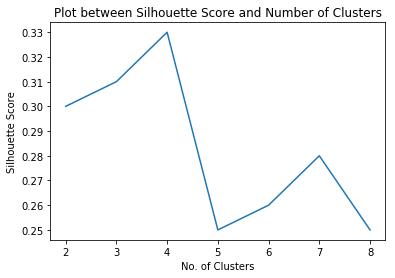

In [22]:
sns.lineplot(n_clusters, sil)
plt.title('Plot between Silhouette Score and Number of Clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Using Silhouette Score we see that for number of clusters equal to 3, the score is close maximum so we will choose 3 as the number of clusters in our final KMeans model. For number of clusters == 3,  the ssd is reasonable as well.

In [23]:
# Final model with k = 3
kmeans = KMeans(n_clusters = 3, max_iter=50, random_state = 42)
kmeans.fit(df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [24]:
# Assigning the labels
df_kmeans = df.copy()
df_kmeans['Labels'] = kmeans.labels_
df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


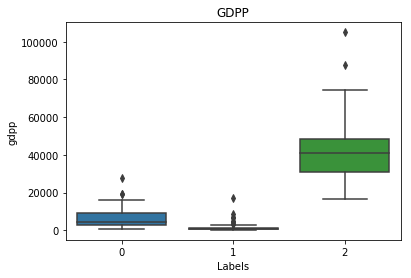

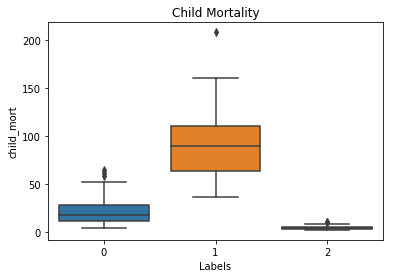

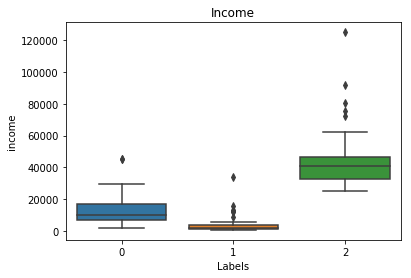

In [25]:
sns.boxplot(y = df_kmeans['gdpp'], x = df_kmeans['Labels'])
plt.title('GDPP')
plt.show()
sns.boxplot(y = df_kmeans['child_mort'], x = df_kmeans['Labels'])
plt.title('Child Mortality')
plt.show()
sns.boxplot(y = df_kmeans['income'], x = df_kmeans['Labels'])
plt.title('Income')
plt.show()

From the above plot, it's clear that cluster 1 is in dire need of aid. It's GDPP, Income are extremely low and Child Mortality is extremely high.

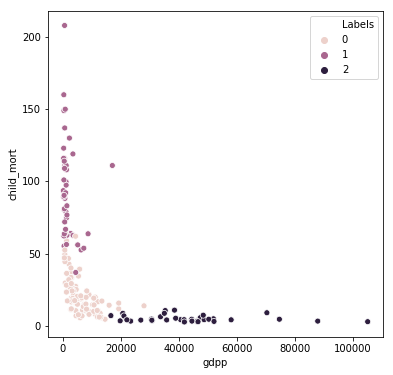

In [26]:
plt.figure(figsize = (6, 6))
sns.scatterplot(df_kmeans['gdpp'], df_kmeans['child_mort'], hue = df_kmeans['Labels'])

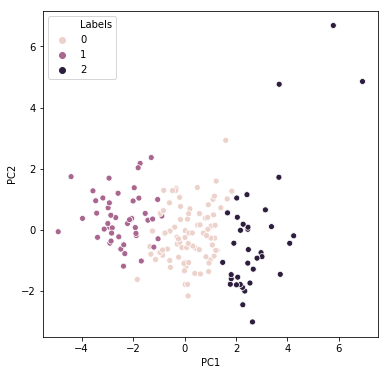

In [27]:
plt.figure(figsize = (6, 6))
sns.scatterplot(df_final['PC1'], df_final['PC2'], hue = df_kmeans['Labels'])
plt.show()

# Hierarchical Clustering

### Single Linkage

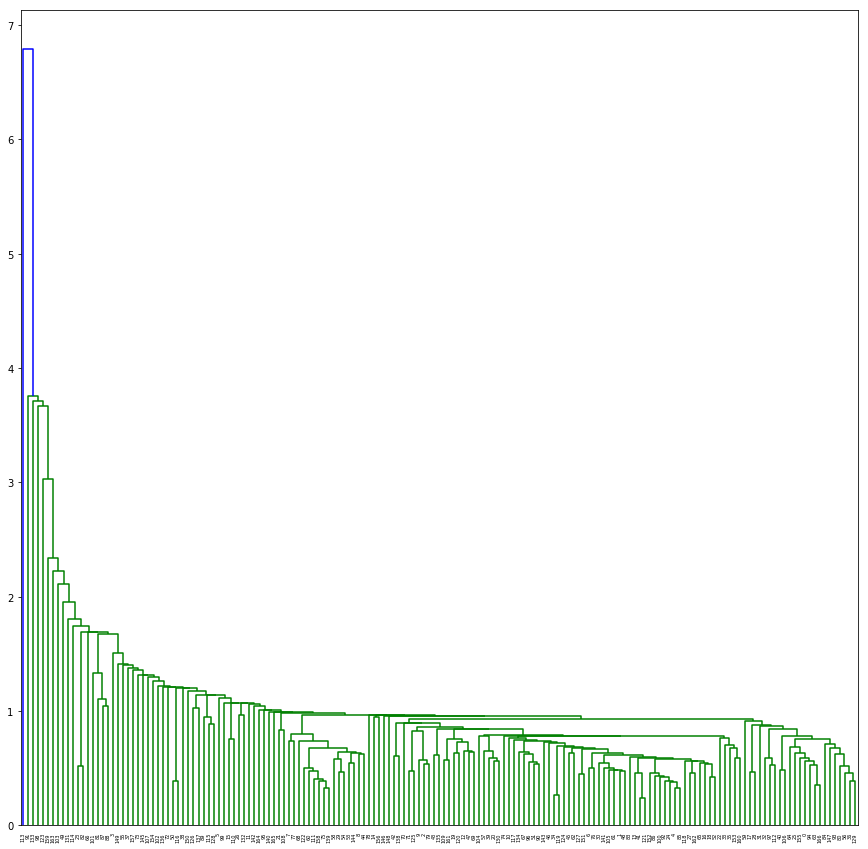

In [28]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (15, 15))
mergings = linkage(df_final, method = "single", metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [29]:
from scipy.cluster.hierarchy import cut_tree
cluster_labels1 = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
df_clus1 = df.copy()
df_clus1['Labels'] = cluster_labels1
df_clus1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


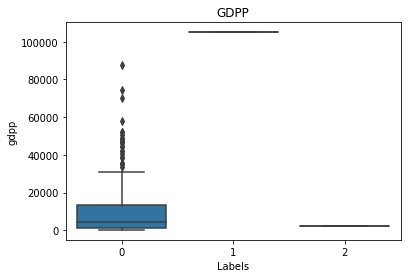

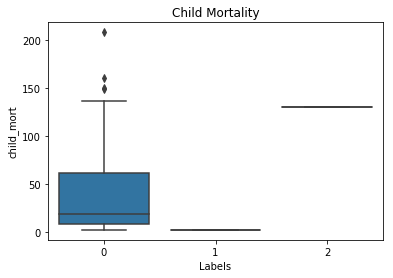

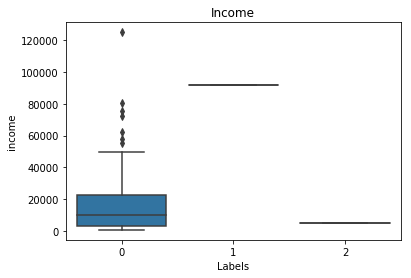

In [31]:
sns.boxplot(y = df_clus1['gdpp'], x = df_clus1['Labels'])
plt.title('GDPP')
plt.show()
sns.boxplot(y = df_clus1['child_mort'], x = df_clus1['Labels'])
plt.title('Child Mortality')
plt.show()
sns.boxplot(y = df_clus1['income'], x = df_clus1['Labels'])
plt.title('Income')
plt.show()

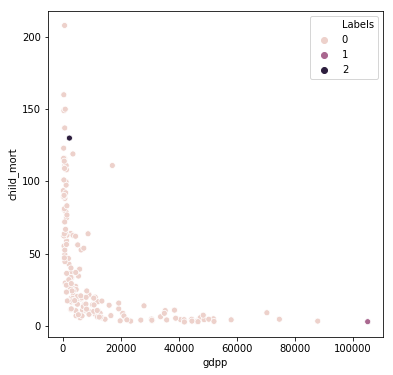

In [32]:
plt.figure(figsize = (6, 6))
sns.scatterplot(df_clus1['gdpp'], df_clus1['child_mort'], hue = df_clus1['Labels'])
plt.show()

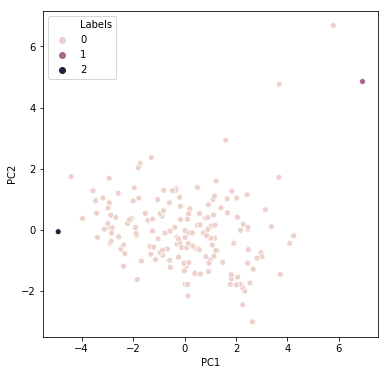

In [33]:
plt.figure(figsize = (6, 6))
sns.scatterplot(df_final['PC1'], df_final['PC2'], hue = df_clus1['Labels'])
plt.show()

Even though, from the boxplot and the scatterplot, it seems like SINGLE LINKAGE clustering can be a good idea but if we observe closely we realize that most of the data points are categorized in one clusters and only 2 data points are distributed between the remaining 2 clusters which suggests this method isn't a good method for this problem.

### Complete Linkage

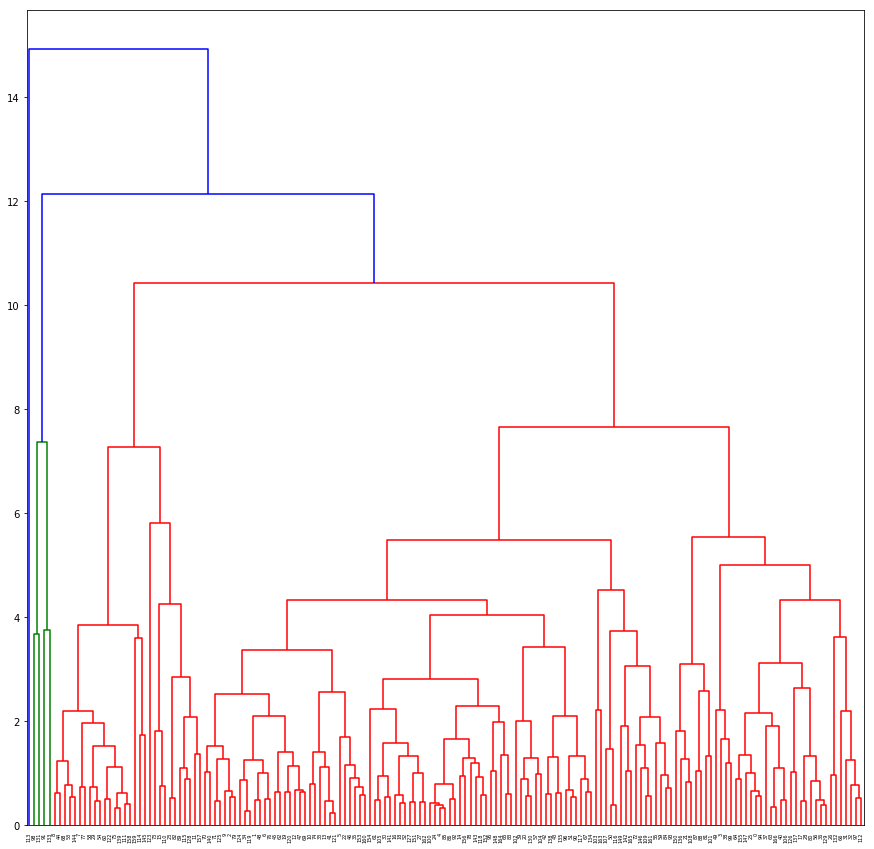

In [34]:
plt.figure(figsize = (15, 15))
mergings = linkage(df_final, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Since in KMeans we have chose the number of clusters to be 3, so here also we will choose the number of clusters to be 3.

In [35]:
cluster_labels2 = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
df_clus2 = df.copy()
df_clus2['Labels'] = cluster_labels2
df_clus2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


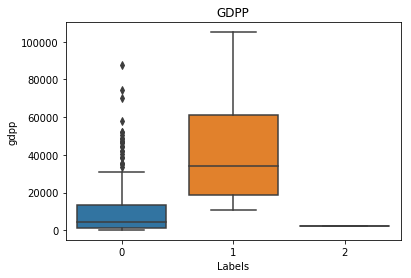

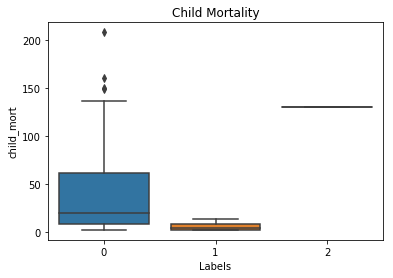

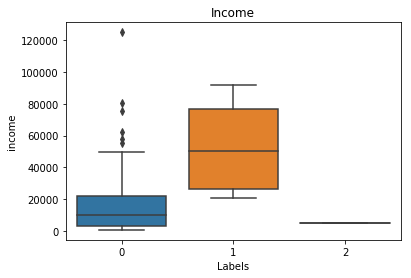

In [37]:
sns.boxplot(y = df_clus2['gdpp'], x = df_clus2['Labels'])
plt.title('GDPP')
plt.show()
sns.boxplot(y = df_clus2['child_mort'], x = df_clus2['Labels'])
plt.title('Child Mortality')
plt.show()
sns.boxplot(y = df_clus2['income'], x = df_clus2['Labels'])
plt.title('Income')
plt.show()

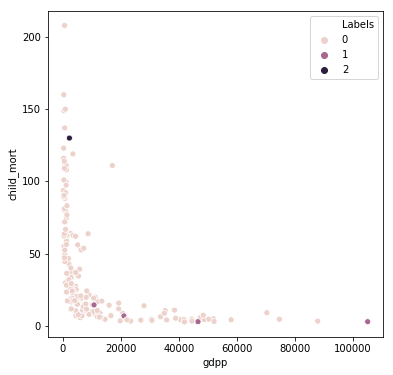

In [38]:
plt.figure(figsize = (6, 6))
sns.scatterplot(df_clus2['gdpp'], df_clus2['child_mort'], hue = df_clus2['Labels'])
plt.show()

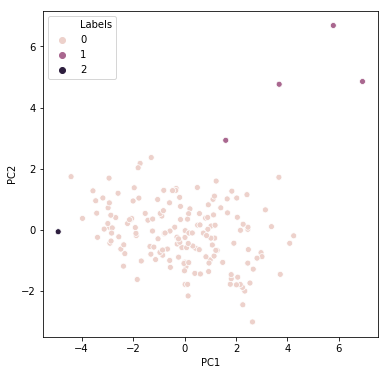

In [39]:
plt.figure(figsize = (6, 6))
sns.scatterplot(df_final['PC1'], df_final['PC2'], hue = df_clus2['Labels'])
plt.show()

Evidently, even COMPLETE LINKAGE method isn't a good option for clustering this data since practically all the data is alloted to one cluster only in this case as well.

#### The performance of Heirarchical Clustering on this dataset isn't a good option since for both methods in this clustering we see how practically all the data is associated with one cluster only. Therefore, we will use KMeans algorithm to make decisions.

In [40]:
df['Labels'] = kmeans.labels_
df_final['Labels'] = kmeans.labels_

In [41]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [42]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,Labels
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,0


# 5 countries most in need of aid
#### We will choose GDPP followed by CHILD MORTALITY as our way of grading the countries.

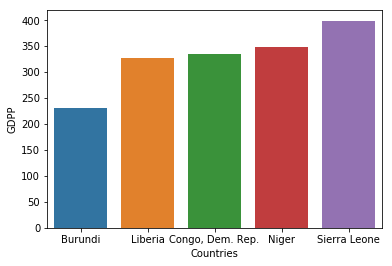

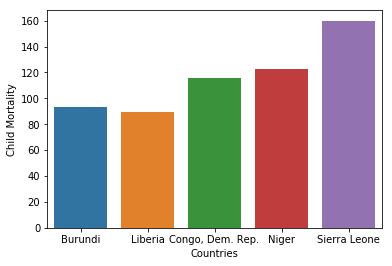

Burundi
Liberia
Congo, Dem. Rep.
Niger
Sierra Leone


In [43]:
sns.barplot(list(df.loc[df['Labels'] == 1].sort_values(by = ['gdpp', 'child_mort'])['country'][:5]), list(df.loc[df['Labels'] == 1].sort_values(by = ['gdpp', 'child_mort'])['gdpp'][:5]))
plt.xlabel('Countries')
plt.ylabel('GDPP')
plt.show()
sns.barplot(list(df.loc[df['Labels'] == 1].sort_values(by = ['gdpp', 'child_mort'])['country'][:5]), list(df.loc[df['Labels'] == 1].sort_values(by = ['gdpp', 'child_mort'])['child_mort'][:5]))
plt.xlabel('Countries')
plt.ylabel('Child Mortality')
plt.show()
for i in list(df.loc[df['Labels'] == 1].sort_values(by = ['gdpp', 'child_mort'])['country'][:5]):
    print(i)

In [44]:
df.loc[df['Labels'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


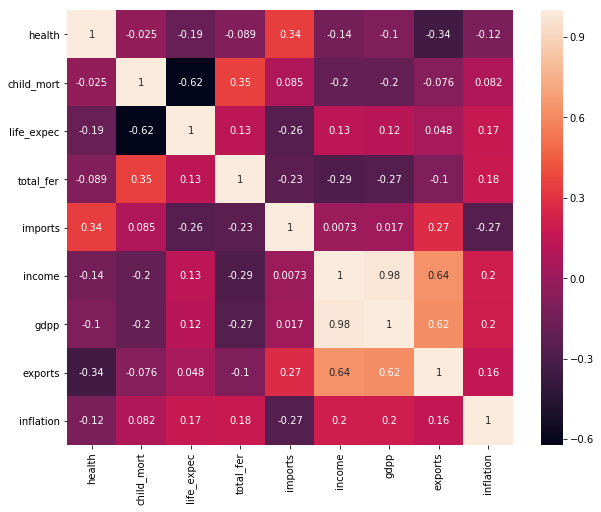

In [45]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.loc[df['Labels'] == 1][list(set(df.loc[df['Labels'] == 1].columns).difference(set({'Labels'})))].corr(), annot = True)